choices에서 correct=TRUE인 row만 불러오기.
true, false 기준으로 정렬 - 둘 다 같은 이미지 찾기 (애초에 두 개 묶어서 저장하면 좋으려나?)
찾았으면 그 이미지에 해당하는 마스크를 더한다. (몇개 더한 건지도 적어주기 - pair별 정답률?)

pair별 정확도, 반응시간, 클릭수 (28x2. 정답만 다른 애들끼리 옆에 놓고 비교)


In [47]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import csv
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import random
from scipy import stats

In [30]:
classes = ['Neutral','Happy','Sad','Surprise','Fear','Disgust','Anger','Contempt']
len(classes)

8

In [3]:
#for file 01 to 02, make correct column
#for file 01 to 03, delete 'start' and 'end' rows (01,02에는 2개만, 03에는 3)
sample1 = 'experiment_data/210204_01/choices_orig.csv'
df1 = pd.read_csv(sample1)
df1['correct'] = df1['true'] == df1['chosen']
df1 = df1.drop([0,281])

sample2 = 'experiment_data/210204_02/choices_orig.csv'
df2 = pd.read_csv(sample2)
df2['correct'] = df2['true'] == df2['chosen']
df2 = df2.drop([0,281])
df2.to_csv('experiment_data/210204_02/choices.csv',index=False)

sample3 = 'experiment_data/210204_03/choices_orig.csv'
df3 = pd.read_csv(sample3)
df3 = df3.drop(columns=['Unnamed: 5'])
df3 = df3.drop([0,141,142])
df3 = df3.rename(columns={'TRUE':'true','FALSE':'false'})
df3.to_csv('experiment_data/210204_03/choices.csv',index=False)

In [19]:
#for file 01 to 04, make count column

saved_root = 'experiment_data/'
participant_list = ['210204_01/','210204_02/','210204_03/','210205_04/']

for folder in participant_list:  
    df = pd.read_csv(saved_root+folder+'choices.csv')
    clicks = pd.read_csv(saved_root+folder+'clicks.csv')
    grouped = clicks.groupby('filename')
    counts = []
    
    for index, row in df.iterrows():
        filename = row['filename'] 
        try:
            count = grouped.size()[filename]
        except:
            count = 0
        counts.append(count)

    df['count'] = counts
    df.to_csv(saved_root+folder+'choices.csv',index=False)

In [31]:
#to read and concat all files

saved_root = '../experiment_data/'
participant_list = os.listdir(saved_root)

print(participant_list)

['210219_01', '210219_02', '210219_04', '210219_05', '210224_06', '210224_07', '210225_08', '210225_09', '210302_10', '210305_11', '210315_13', '210315_14', '210315_15', '210315_16', '210316_17', '210316_18', '210316_19', '210317_20', '210317_21', '210318_22', '210319_23', '210319_24']


In [32]:
dfs = []
accs = []

for folder in participant_list:
    single = pd.read_csv(saved_root+folder+'/choices.csv')
    #print accuracies for each participants
    acc = single['correct'].mean()
    accs.append(acc)
    print(folder,':{:.2f}     len:{}'.format(acc,len(single)))
    dfs.append(single)
    
df = pd.concat(dfs, axis=0, ignore_index=True, sort=False)
#df = df.drop(columns=['time']) #drop it for now
df

210219_01 :0.82     len:280
210219_02 :0.83     len:280
210219_04 :0.88     len:280
210219_05 :0.80     len:280
210224_06 :0.81     len:280
210224_07 :0.84     len:280
210225_08 :0.84     len:280
210225_09 :0.87     len:280
210302_10 :0.82     len:280
210305_11 :0.82     len:280
210315_13 :0.81     len:280
210315_14 :0.90     len:280
210315_15 :0.83     len:280
210315_16 :0.88     len:280
210316_17 :0.84     len:280
210316_18 :0.88     len:280
210316_19 :0.78     len:280
210317_20 :0.85     len:280
210317_21 :0.86     len:280
210318_22 :0.84     len:280
210319_23 :0.85     len:280
210319_24 :0.85     len:280


,filename,true,false,chosen,correct,time,count
0,3/171.jpg,3,7,3,True,4.010,8
1,4/168.jpg,4,1,4,True,2.618,5
2,1/57.jpg,1,5,1,True,4.872,8
3,1/127.jpg,1,3,1,True,4.993,10
4,7/142.jpg,7,6,7,True,5.045,10
...,...,...,...,...,...,...,...
6155,1/161.jpg,1,3,1,True,2.975,3
6156,7/25.jpg,7,3,7,True,2.997,4
6157,4/146.jpg,4,1,4,True,1.664,1
6158,0/28.jpg,0,7,0,True,3.162,4


In [7]:
print(np.mean(accs),np.std(accs))

0.8405844155844157 0.02775926558415462


In [33]:
#check rows that were skipped without image clicks
#and change their 'correct' values to 'False'
df['count'].value_counts()[0]
count0 = df[df['count'] == 0].index
df['correct'][count0] = False

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [34]:
#total accuracy
df['correct'].mean()

0.8389610389610389

In [35]:
df['correct'].std()

0.3675967224073449

In [11]:
df.groupby('true').mean()['correct']  #true means true label

true
0    0.854545
1    0.889610
2    0.842857
3    0.881818
4    0.824675
5    0.796104
6    0.801299
7    0.820779
Name: correct, dtype: float64

In [12]:
df

,filename,true,false,chosen,correct,time,count
0,3/171.jpg,3,7,3,True,4.010,8
1,4/168.jpg,4,1,4,True,2.618,5
2,1/57.jpg,1,5,1,True,4.872,8
3,1/127.jpg,1,3,1,True,4.993,10
4,7/142.jpg,7,6,7,True,5.045,10
...,...,...,...,...,...,...,...
6155,1/161.jpg,1,3,1,True,2.975,3
6156,7/25.jpg,7,3,7,True,2.997,4
6157,4/146.jpg,4,1,4,True,1.664,1
6158,0/28.jpg,0,7,0,True,3.162,4


In [16]:
mask = np.zeros((8,8))
for i in range(8):
    mask[i,i] = 1
mask

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

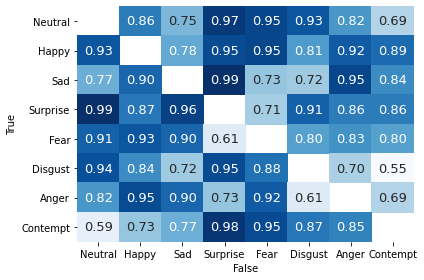

In [36]:
grouped_multiple = df.groupby(['true', 'false']).agg({'correct': ['mean','std']})
grouped_multiple.columns = ['acc','std']
grouped_multiple = grouped_multiple.reset_index()

fill_in = [[i,i,0.4,0.4] for i in range(8)]
fill_in = pd.DataFrame(fill_in,columns=['true','false','acc','std'])

filled_df = grouped_multiple.append(fill_in)
filled_df = filled_df.sort_values(by=['true','false'])

acc = filled_df.acc.values
acc = acc.reshape((-1,8))

fig = sns.heatmap(acc,xticklabels=classes, yticklabels=classes,mask=mask,annot_kws={'size':13},annot=True,fmt='.2f',cmap='Blues',cbar=False)
fig.set(xlabel='False',ylabel='True')

plt.tight_layout()
#plt.savefig('ACPR/avg_acc_masked.png')

In [44]:
avg_by_pair = df.groupby(['true', 'false']).agg({'correct':['mean'],'time':['mean'],'count':['mean']})
avg_by_pair

correct      time      count
                mean      mean       mean
true false                               
0    1      0.863636  6.000682   8.690909
     2      0.754545  6.602045   9.527273
     3      0.972727  5.260282   7.954545
     4      0.954545  5.416300   7.509091
     5      0.927273  6.375436   8.918182
     6      0.818182  6.331600   9.481818
     7      0.690909  6.680618   9.845455
1    0      0.927273  4.457773   6.963636
     2      0.781818  5.790473   8.418182
     3      0.945455  4.714245   7.036364
     4      0.954545  5.039673   7.600000
     5      0.809091  6.272682   9.290909
     6      0.918182  5.752882   8.027273
     7      0.890909  4.620945   7.272727
2    0      0.772727  6.525936   9.454545
     1      0.900000  5.924864   8.990909
     3      0.990909  5.397964   8.318182
     4      0.727273  6.883555   8.881818
     5      0.718182  6.929791   9.445455
     6      0.954545  5.950709   8.345455
     7      0.836364  7.507482  10.418182
3    0      0.990909  4.181264   6.490909
     1      0.872727  5.324100   7.263636
     2      0.963636  4.105727   5.936364
     4      0.709091  6.042555   7.854545
     5      0.909091  5.112400   7.327273
     6      0.863636  6.616818   9.072727
     7      0.863636  6.105091   9.145455
4    0      0.909091  5.440582   8.181818
     1      0.927273  4.778536   6.909091
     2      0.900000  5.360955   7.272727
     3      0.609091  6.918691   9.136364
     5      0.800000  6.032809   8.481818
     6      0.827273  6.357273   8.672727
     7      0.800000  5.644891   7.945455
5    0      0.936364  5.477327   8.036364
     1      0.836364  5.555273   8.190909
     2      0.718182  7.135227  10.072727
     3      0.945455  6.160336   8.490909
     4      0.881818  6.297855   9.045455
     6      0.700000  7.664982   9.727273
     7      0.554545  7.580764   9.345455
6    0      0.818182  5.789482   8.363636
     1      0.945455  6.818382   9.690909
     2      0.900000  6.050355   8.245455
     3      0.727273  6.195891   8.972727
     4      0.918182  5.740964   8.045455
     5      0.609091  6.728000   9.118182
     7      0.690909  6.775145   9.400000
7    0      0.590909  6.858345   9.654545
     1      0.727273  7.475636  10.800000
     2      0.772727  6.828491   9.654545
     3      0.981818  6.149200   9.227273
     4      0.945455  6.429445   9.000000
     5      0.872727  7.220982   9.172727
     6      0.854545  7.309164   9.963636

In [51]:
correct_array = avg_by_pair[('correct', 'mean')].values
time_array = avg_by_pair[('time', 'mean')].values
count_array = avg_by_pair[('count', 'mean')].values

In [45]:
#now get the correlation value between the three variables
corr = avg_by_pair.corr(method='pearson')
print(corr)

               correct      time     count
                  mean      mean      mean
correct mean  1.000000 -0.654602 -0.559315
time    mean -0.654602  1.000000  0.931416
count   mean -0.559315  0.931416  1.000000


In [52]:
stats.pearsonr(correct_array,time_array)

(-0.6546019344174087, 4.439245248281882e-08)

In [53]:
stats.pearsonr(correct_array,count_array)

(-0.5593148220718469, 7.431761949067159e-06)

In [54]:
stats.pearsonr(count_array,time_array)

(0.931416157700784, 2.2911290630514034e-25)

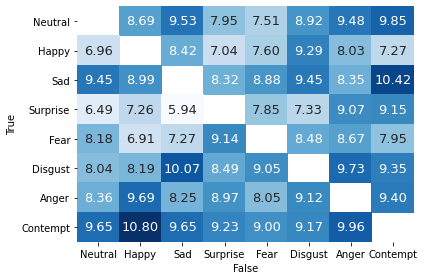

In [286]:
grouped_multiple = df.groupby(['true', 'false']).agg({'count': ['mean','std']})
grouped_multiple.columns = ['avg_count','std']
grouped_multiple = grouped_multiple.reset_index()

fill_in = [[i,i,5,5] for i in range(8)]
fill_in = pd.DataFrame(fill_in,columns=['true','false','avg_count','std'])

filled_df = grouped_multiple.append(fill_in)
filled_df = filled_df.sort_values(by=['true','false'])

avg_count = filled_df.avg_count.values
avg_count = avg_count.reshape((-1,8))

fig = sns.heatmap(avg_count,xticklabels=classes, yticklabels=classes,mask=mask,annot_kws={'size':13},annot=True,fmt='.2f',cmap='Blues',cbar=False)
fig.set(xlabel='False',ylabel='True')

plt.tight_layout()
plt.savefig('ACPR/avg_count_masked.png')

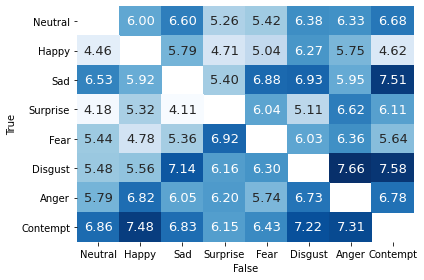

In [285]:
grouped_multiple = df.groupby(['true', 'false']).agg({'time': ['mean','std']})
grouped_multiple.columns = ['avg_time','std']
grouped_multiple = grouped_multiple.reset_index()

fill_in = [[i,i,3,3] for i in range(8)]
fill_in = pd.DataFrame(fill_in,columns=['true','false','avg_time','std'])

filled_df = grouped_multiple.append(fill_in)
filled_df = filled_df.sort_values(by=['true','false'])

avg_times = filled_df.avg_time.values
avg_times = avg_times.reshape((-1,8))

fig = sns.heatmap(avg_times,xticklabels=classes, yticklabels=classes,mask=mask,annot_kws={'size':13},annot=True,fmt='.2f',cmap='Blues',cbar=False)
fig.set(xlabel='False',ylabel='True')

plt.tight_layout()
plt.savefig('ACPR/avg_time_masked.png')

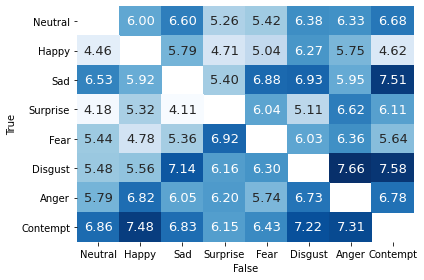

In [283]:
grouped_multiple = df.groupby(['true', 'false']).agg({'time': ['mean','std']})
grouped_multiple.columns = ['avg_time','std']
grouped_multiple = grouped_multiple.reset_index()

fill_in = [[i,i,0,0] for i in range(8)]
fill_in = pd.DataFrame(fill_in,columns=['true','false','avg_time','std'])

filled_df = grouped_multiple.append(fill_in)
filled_df = filled_df.sort_values(by=['true','false'])

avg_times = filled_df.avg_time.values
avg_times = avg_times.reshape((-1,8))


fig = sns.heatmap(avg_times,xticklabels=classes, yticklabels=classes,mask=mask,annot_kws={'size':13},annot=True,fmt='.2f',cmap='Blues',cbar=False)
fig.set(xlabel='False',ylabel='True')

plt.tight_layout()
#plt.savefig('ACPR/avg_time.png')

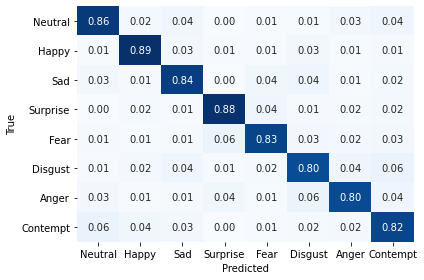

In [64]:
#I could make a confusion matrix with these. 'true' as column and 'false' as row, and cells are accuracies
cm_true = np.array(df['true'])
cm_chosen = np.array(df['chosen'])
cm = confusion_matrix(cm_true, cm_chosen, normalize='true')
fig = sns.heatmap(cm,xticklabels=classes, yticklabels=classes,annot=True,fmt='.2f',cmap='Blues',cbar=False)
fig.set(xlabel='Predicted',ylabel='True')

plt.tight_layout()
plt.savefig('human_acc.png')

In [66]:
import pickle
with open('human_cm.txt', 'wb') as f:
    pickle.dump(cm, f)

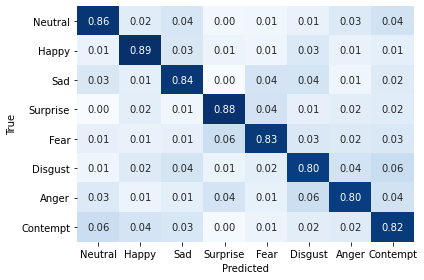

In [63]:
fig = sns.heatmap(cm_sqrt,xticklabels=classes,yticklabels=classes,annot=cm,fmt='.2f',cmap='Blues',cbar=False)
fig.set(xlabel='Predicted',ylabel='True')

plt.tight_layout()
plt.savefig('human_acc_sqrt.png')

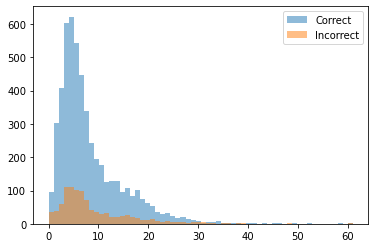

Mode of correct: 5, Mode of incorrect: 4


In [18]:
#get a plot with count and accuracy
#first, two histograms
t = list(df[df['correct'] == True]['count'])
f = list(df[df['correct'] == False]['count'])

mx = max(np.max(t),np.max(f))
bins = np.linspace(0, mx, mx)

plt.hist(t, bins, alpha=0.5, label='Correct')
plt.hist(f, bins, alpha=0.5, label='Incorrect')
plt.legend(loc='upper right')
plt.show()

print('Mode of correct: {}, Mode of incorrect: {}'.format(max(t, key=t.count),max(f, key=f.count)))

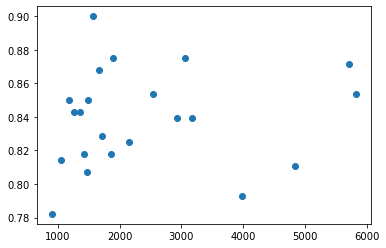

In [88]:
#second, get average accuracy by participants and draw a scatter plot
#cut every 280 rows and get mean of correct & total count
num_trials = 280
accs = []
total_counts = []
for i in range(len(participant_list)):    
    one_p = df[num_trials*i:num_trials*(i+1)]
    acc = one_p['correct'].mean()
    total_count = one_p['count'].sum()
    accs.append(acc)
    total_counts.append(total_count)

scatter = plt.scatter(total_counts,accs)

#Device Configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#Hyper parameters
num_classes = 2
batch_size = 32
learning_rate = 0.0001

In [19]:
#show averaged heatmaps for pictures with same true/false labels - that is, five pictures
#first find images with same true/false labels
def get_filelist(root):
    filename_list = []

    for emotion in range(8):
        #get list of filenames
        one_folder = os.listdir(root+str(emotion))
        
        #create label lists
        true = [emotion]*len(one_folder)
        temp = list(range(8))*5
        false = [i for i in temp if i is not emotion]   #this means that for a specific image, its false label will always be the same.
          
        #assign true/false labels to each filename
        for i, filename in enumerate(one_folder):
            chunk = [str(emotion)+'/'+filename,true[i],false[i]]
            filename_list.append(chunk)
        
    random.shuffle(filename_list)
    
    return filename_list

def find_filename(true,false):
    filelist = get_filelist('../35samples/')
    group = []
    for sample in filelist:
        if sample[1] == true and sample[2] == false:
            group.append(sample[0])
    return group

In [21]:
#sort by filename and get accuracy by image
#find images with lowest accuracy (display filename, acc, true/false label) and replace them if needed

filelist = get_filelist('../35samples/')
filelist.sort()
acc_by_file = []
n_p = len(participant_list)

df_sorted = df.sort_values('filename',ignore_index=True)

for i in range(280):
    filename = df_sorted['filename'][i*n_p]
    true, false = df_sorted['true'][i*n_p], df_sorted['false'][i*n_p]
    acc = df_sorted['correct'][i*n_p:(i+1)*n_p].mean()
    acc_by_file.append([filename,true,false,round(acc,2)])
    #print(filename,true,false,acc)

acc_by_file.sort(key = lambda x: x[3])

for i in range(30):
    print(acc_by_file[i])

['0/144.jpg', 0, 7, 0.05]
['6/110.jpg', 6, 5, 0.18]
['6/189.jpg', 6, 3, 0.23]
['4/154.jpg', 4, 5, 0.27]
['5/135.jpg', 5, 7, 0.32]
['7/0.jpg', 7, 0, 0.32]
['7/51.jpg', 7, 2, 0.32]
['0/143.jpg', 0, 6, 0.36]
['7/145.jpg', 7, 0, 0.36]
['2/152.jpg', 2, 0, 0.41]
['2/163.jpg', 2, 5, 0.41]
['4/152.jpg', 4, 3, 0.41]
['4/161.jpg', 4, 6, 0.41]
['5/180.jpg', 5, 7, 0.41]
['7/74.jpg', 7, 0, 0.41]
['2/110.jpg', 2, 4, 0.45]
['2/149.jpg', 2, 7, 0.45]
['5/130.jpg', 5, 6, 0.45]
['6/98.jpg', 6, 7, 0.45]
['3/51.jpg', 3, 1, 0.5]
['4/90.jpg', 4, 7, 0.5]
['5/41.jpg', 5, 1, 0.5]
['4/24.jpg', 4, 3, 0.55]
['5/156.jpg', 5, 2, 0.55]
['5/45.jpg', 5, 2, 0.55]
['6/2.jpg', 6, 5, 0.55]
['0/181.jpg', 0, 2, 0.59]
['2/34.jpg', 2, 4, 0.59]
['3/2.jpg', 3, 4, 0.59]
['4/112.jpg', 4, 3, 0.59]


In [27]:
df_sorted['correct'][:22]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
Name: correct, dtype: bool

In [1]:
#plot histogram with accuracies by image
acc_by_img = [x[3] for x in acc_by_file]

bins = np.linspace(0,1,9)

plt.hist(acc_by_img, bins)
plt.show()

NameError: name 'acc_by_file' is not defined

In [17]:
#display images with accuracies less than ... 0.5?

In [18]:
#accuracy of trials with >20 clicks
print(df[df['count']>20]['correct'].mean())
#accuracy of trials with <20 clicks
print(df[df['count']<=20]['correct'].mean())

0.7821229050279329
0.8424681144432954


In [19]:
def normalize(array):
    if np.min(array) == 0 and np.max(array) == 0:
        normalized = array
    else:
        normalized = (array-np.min(array))/(np.max(array)-np.min(array))
    return normalized

In [20]:
def multiply(img,mask):
    img_new = img.copy()
    img_new[:,:,0] = np.multiply(img_new[:,:,0],mask)
    img_new[:,:,1] = np.multiply(img_new[:,:,1],mask)
    img_new[:,:,2] = np.multiply(img_new[:,:,2],mask)
    return img_new

In [21]:
def change_filename(filename):
    if filename[1] is '/':
        emotion = filename.split('/')[0]
        picnum = filename.split('/')[1].split('.')[0]
    else:
        emotion = filename.split('.')[0]
        picnum = ''
    return emotion+'_'+picnum

IndexError: index 9 is out of bounds for axis 0 with size 9

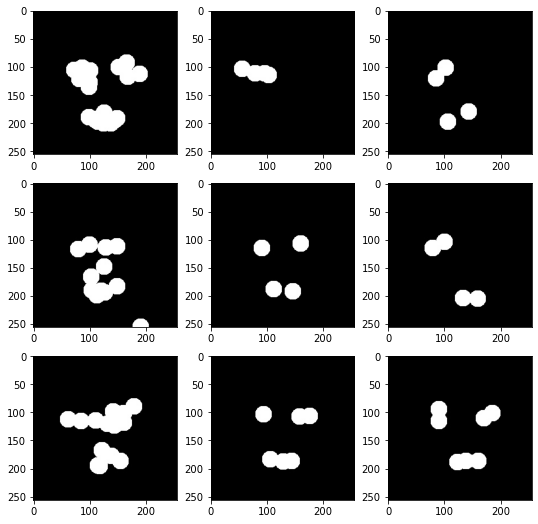

In [22]:
#show 4 heatmaps for the same picture and average them

masks = []
#root = 'experiment_data/'
file = '0_10_mask.jpg'
file_orig = '0/10.jpg'
#folder_list = ['210204_01/','210204_02/','210204_03/','210205_04/','210209_05','210209_06']
added = np.zeros((256,256,3))

fig, axes = plt.subplots(3,3,figsize=(9,9))
axes = axes.ravel()
for i in range(len(participant_list)):
    img = cv2.imread(saved_root+participant_list[i]+'/'+file)
    axes[i].imshow(img, cmap='gray')
    added += img
    
plt.show()

added = normalize(added)
added = np.clip(added,0,1)
plt.imshow(added,cmap='gray')
plt.show()

original = cv2.imread('35samples/'+file_orig)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
mean_masked = normalize(np.multiply(original,added))
plt.imshow(mean_masked)
plt.show()

In [23]:
find_filename(0,1)

['0/145.jpg', '0/10.jpg', '0/36.jpg', '0/171.jpg', '0/70.jpg']

In [24]:
temp = pd.read_csv('pilot_data/'+'210204_01/'+'choices.csv')
#temp['correct'].where(temp['filename'] == '5/80.jpg')
a=temp.loc[temp['filename'] == '5/80.jpg']['correct']
if a.bool() == True:
    print('a')

a


In [242]:
#show averaged heatmaps for pictures with same true/false labels - that is, five pictures
# 0: 'Neutral', 1: 'Happy', 2: 'Sad', 3: 'Surprise', 4: 'Fear', 5: 'Disgust', 6: 'Anger', 7: 'Contempt'

def same_pair(true,false,root,folder_list,show=False,subtract_incorrect=False):
   
    originals, all_masks, correct_masks = [], [], []
    averaged_all = np.zeros((256,256,3))
    averaged_correct = np.zeros((256,256,3))
    n_correct = 0
    filelist = find_filename(true,false)
    filelist.sort()
    
    for filename in filelist: #for each of the five pictures

        added_correct = np.zeros((256,256,3)) #to average masks over correct samples
        added_all = np.zeros((256,256,3)) #average masks over all samples
        original = cv2.imread('35samples/'+filename)
        original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
        originals.append(original)

        for folder in folder_list: #for each participant
            temp = pd.read_csv(root+folder+'/choices.csv')
            correct = temp.loc[temp['filename'] == filename]['correct']
            img = cv2.imread(root+folder+'/'+change_filename(filename)+'_mask.jpg')
            added_all += img
            
            if correct.bool() == True:
                added_correct += img       #add correct masks over participants for one picture
                n_correct += 1
                
            elif correct.bool() == False:
                if subtract_incorrect == True:
                    img = cv2.imread(root+folder+'/'+change_filename(filename)+'_mask.jpg')
                    added_correct -= img       #subtract incorrect masks
                            
        added_all = normalize(added_all)
        added_correct = normalize(added_correct)
        
        all_masks.append(added_all)
        correct_masks.append(added_all)
        
        averaged_all += added_all   #averaged over one picture
        averaged_correct += added_correct

    if show is True:
        #show masks and masked images
        fig, axes = plt.subplots(2,len(correct_masks),figsize=(len(correct_masks)*3,6))
        for i, mask in enumerate(correct_masks): #length of masks is always 5
            axes[0][i].imshow(mask, cmap='gray')
            mean_masked = normalize(np.multiply(originals[i],mask))
            axes[1][i].imshow(mean_masked)
            axes[1][i].set_title(filelist[i])
        plt.show()

        plt.imshow(averaged)
        plt.show()
    
    acc = n_correct / (5*len(folder_list))
    return averaged_all, averaged_correct, acc

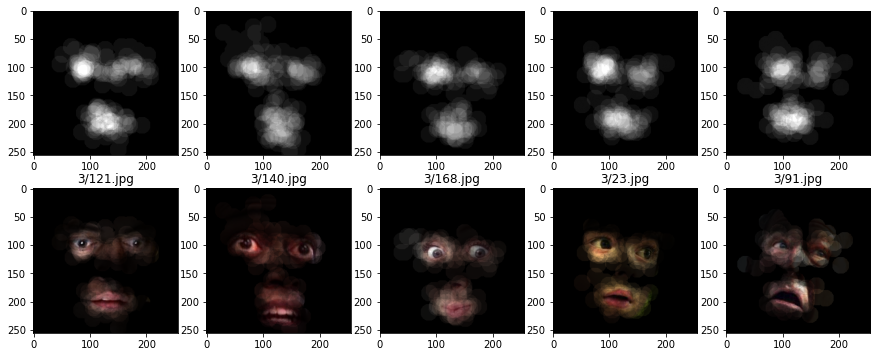

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


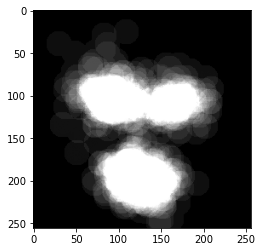

0.8727272727272727


In [43]:
averaged,acc = same_pair(3,6,saved_root,participant_list,show=True,subtract_incorrect=False)
print(acc)

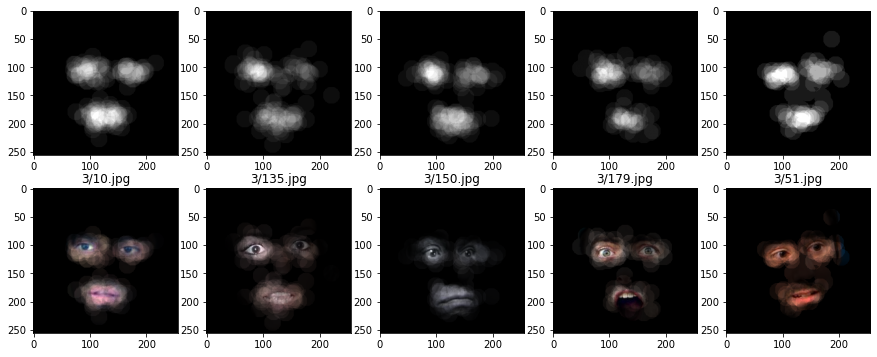

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


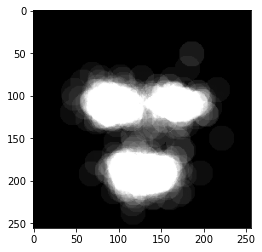

0.8818181818181818


In [44]:
averaged,acc = same_pair(3,1,saved_root,participant_list,show=True,subtract_incorrect=False)
print(acc)

In [228]:
pairs = []
order_pairs = []

for lbl1 in range(8):
    temp = list(range(8))
    lbl2_list = [i for i in temp if i is not lbl1]
    for lbl2 in lbl2_list:
        order_pairs.append([lbl1,lbl2])
        if lbl1 < lbl2:
            pairs.append([lbl1,lbl2])

In [243]:
all_masks = []
correct_masks = []
accs = []

for true, false in order_pairs:
    averaged_all, averaged_correct, acc = same_pair(true,false,saved_root,participant_list,show=False,subtract_incorrect=False)
    all_masks.append(averaged_all)
    correct_masks.append(averaged_correct)
    accs.append(acc)

In [221]:
masks = []
accs = []
for i in range(8):
    false_list = list(range(8))
    false_list.remove(i)
    for j in range(7):
        true = i
        false = false_list[j]
        mask, acc = same_pair(true,false,saved_root,participant_list,show=False,subtract_incorrect=False)
        masks.append([mask,true,false])
        accs.append(acc)

In [230]:
def to_255(img):
    return ((img-np.min(img))*255/(np.max(img)-np.min(img))).astype(int)

In [255]:
with open('ACPR/saliency_human/accs.txt', 'wb') as f:
    pickle.dump(accs, f)

In [256]:
with open('ACPR/saliency_human/accs.txt', 'rb') as f:
    data = pickle.load(f)

In [258]:
len(data)

56

In [259]:
#save heatmaps into files
for i, heatmap in enumerate(correct_masks):
    cv2.imwrite('ACPR/saliency_human/correct/'+str(order_pairs[i][0])+str(order_pairs[i][1])+'.jpg',to_255(heatmap))
for i, heatmap in enumerate(all_masks):
    cv2.imwrite('ACPR/saliency_human/all/'+str(order_pairs[i][0])+str(order_pairs[i][1])+'.jpg',to_255(heatmap))

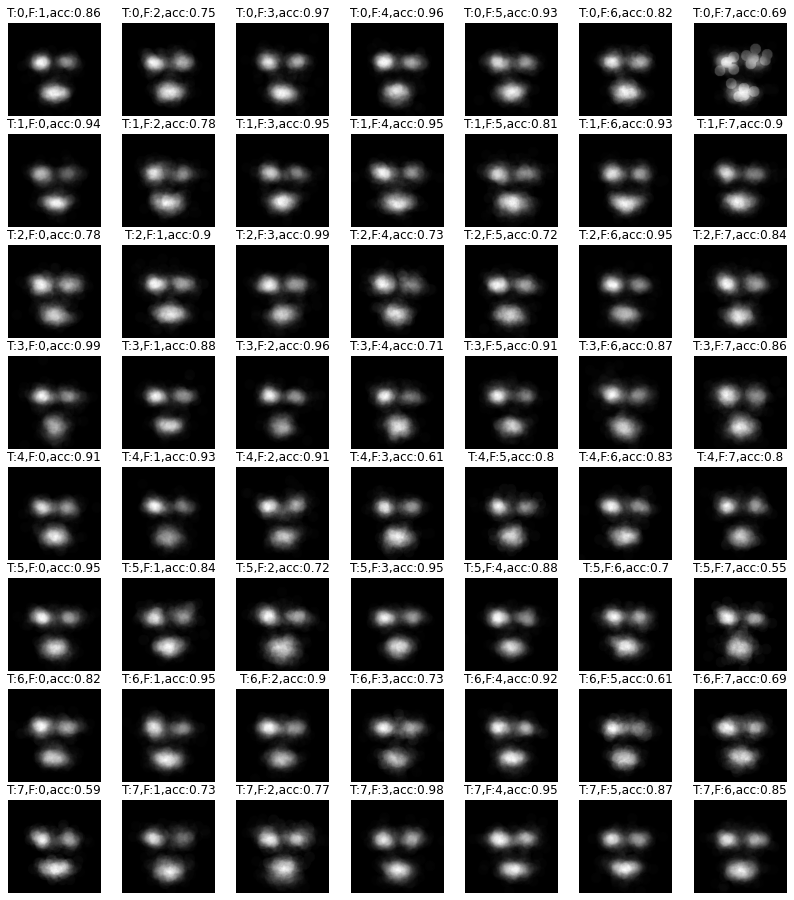

In [241]:
#show masks and masked images
fig, axes = plt.subplots(8,7,figsize=(14,16))
axes = axes.ravel()
for i in range(56):
    axes[i].imshow(masks_255[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('T:{},F:{},acc:{}'.format(order_pairs[i][0],order_pairs[i][1],round(accs[i],2)))
plt.show()

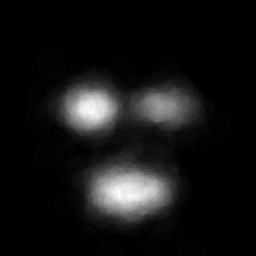

In [262]:
img = Image.open('ACPR/saliency_human/all/01.jpg')
img

In [1]:
true, false = 0,1

saliency_list = []
accs = []
averaged_all = np.zeros((256,256,3))
averaged_correct = np.zeros((256,256,3))
n_correct = 0
filelist = find_filename(true,false)
filelist.sort()

for filename in filelist: #for each of the five pictures

    added_correct = np.zeros((256,256,3)) #to average masks over correct samples
    added_all = np.zeros((256,256,3)) #average masks over all samples
    original = cv2.imread('35samples/'+filename)
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    originals.append(original)

    for folder in folder_list: #for each participant
        temp = pd.read_csv(root+folder+'/choices.csv')
        correct = temp.loc[temp['filename'] == filename]['correct']
        img = cv2.imread(root+folder+'/'+change_filename(filename)+'_mask.jpg')
        added_all += img

        if correct.bool() == True:
            added_correct += img       #add correct masks over participants for one picture
            n_correct += 1

        elif correct.bool() == False:
            if subtract_incorrect == True:
                img = cv2.imread(root+folder+'/'+change_filename(filename)+'_mask.jpg')
                added_correct -= img       #subtract incorrect masks

    added_all = normalize(added_all)
    added_correct = normalize(added_correct)


NameError: name 'np' is not defined

In [ ]:
#show masks and masked images
fig, axes = plt.subplots(2,len(correct_masks),figsize=(len(correct_masks)*3,6))
for i, mask in enumerate(correct_masks): #length of masks is always 5
    axes[0][i].imshow(mask, cmap='gray')
    mean_masked = normalize(np.multiply(originals[i],mask))
    axes[1][i].imshow(mean_masked)
    axes[1][i].set_title(filelist[i])
plt.show()

plt.imshow(averaged)
plt.show()